In [1]:
import numpy as np
import sys
sys.path.insert(0, "src/")
import matplotlib
%matplotlib inline
from scipy.integrate import trapz as integr
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as MSE
from data import Sample, smooth, Spectra, SpectraTheory, Image
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle
from fitting import NNLS
from camera import TheorSample, CameraCalibration, MetaSpectraCalibration
import os, re
%load_ext autoreload
%autoreload 2

In /home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
DATA = 'data/'
METADATA = 'metadata/'

In [6]:
datadir= DATA + 'final/processed/'
image_type = 'lu'
filelist=sorted(os.listdir(datadir),key=lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]) 
sample_file_names= [os.path.splitext(file)[0] for file in filelist if file.endswith('.csv')]
sample_type = 'A'
mirror = 'mirr'+sample_type
a_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
a_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : False}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
              for file in a_samples]
sample_type = 'B'
mirror = 'mirr'+sample_type
b_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
b_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : False}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
              for file in b_samples]
# sample_type = 'C'
# mirror = 'mirr'+sample_type
# c_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
# c_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : False}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in c_samples]
# sample_type = 'D'
# mirror = 'mirr'+sample_type
# d_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
# d_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : False}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in d_samples]

# c_samples=[sample for sample in sample_file_names if sample[0] == sample_type]
# d_samples=[sample for sample in sample_file_names if sample[0] == sample_type]
# ab_samples = [Sample(file, 'mirror_AB', folder=datadir, spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in ab_samples]
# c_samples = [Sample(file, 'mirror_C', folder=datadir, spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in c_samples]
# d_samples = [Sample(file, 'mirror_D', folder=datadir, spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in d_samples]

ld


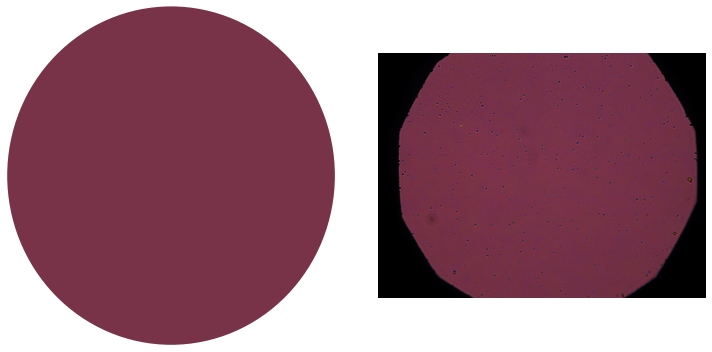

lu


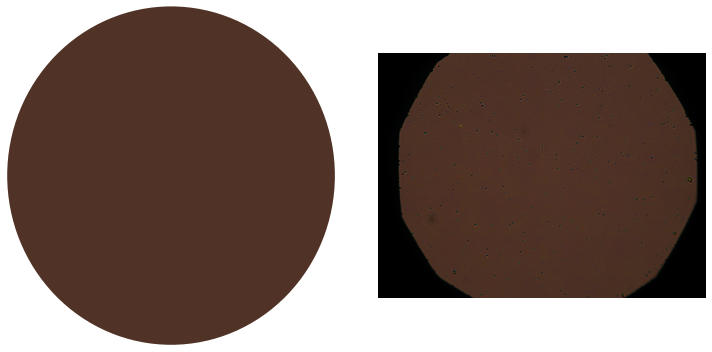

In [9]:
sample_type = 'B'
samplefile = sample_type + '10'
image_type = 'ld' # ld lu sd su
print(image_type)
im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
im.show()
image_type = 'lu' # ld lu sd su
print(image_type)
im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
im.show()
# image_type = 'sd' # ld lu sd su
# print(image_type)
# im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
# im.show()
# image_type = 'su' # ld lu sd su
# print(image_type)
# im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
# im.show()

In [10]:
#samples = b_samples[5:] + d_samples[4:]
samples = a_samples + b_samples
samples = np.array(samples)

In [12]:
samples.__len__()

51

In [13]:
np.save(METADATA + 'ab_samples_lu_final.npy', samples)

0.000454766665493


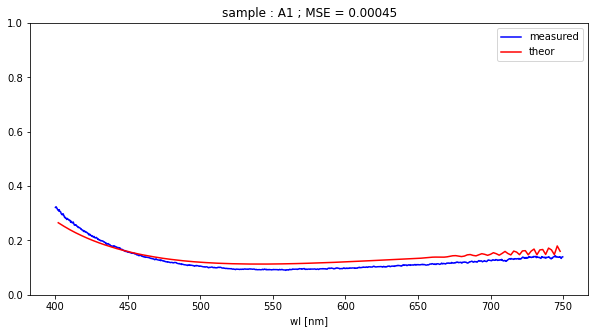

0.000323562456372


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

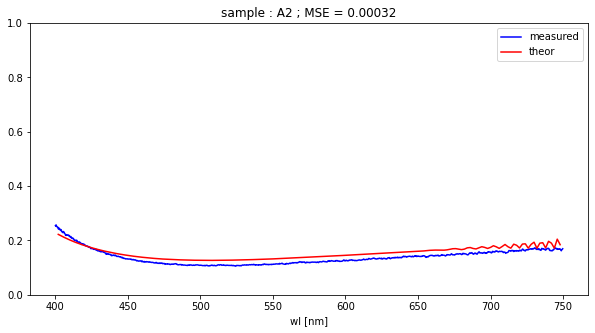

0.000105125880102


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

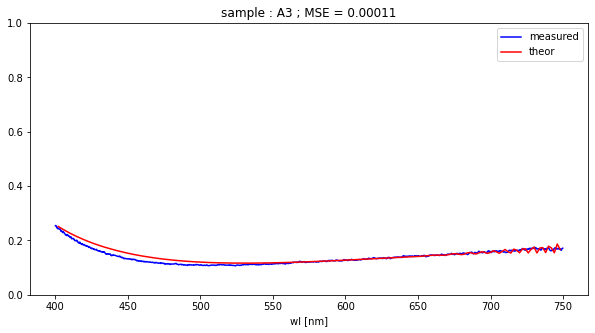

3.19167403214e-05


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

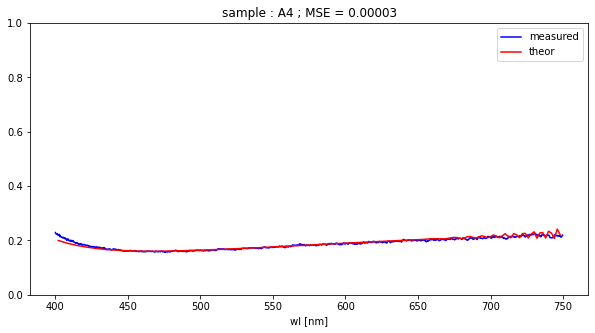

0.000170640983642


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

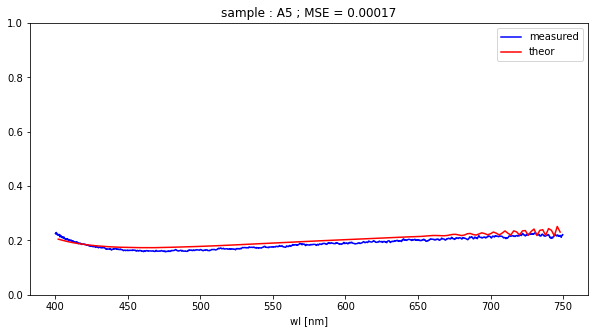

0.000438901397574


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

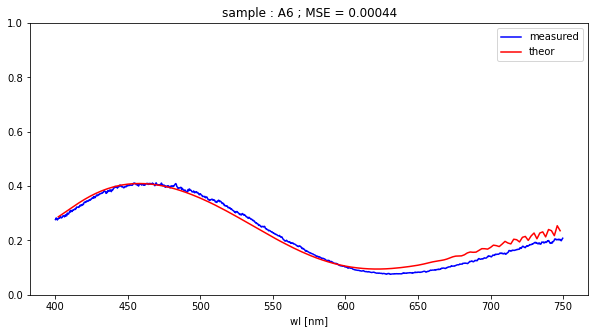

0.000757182012008


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

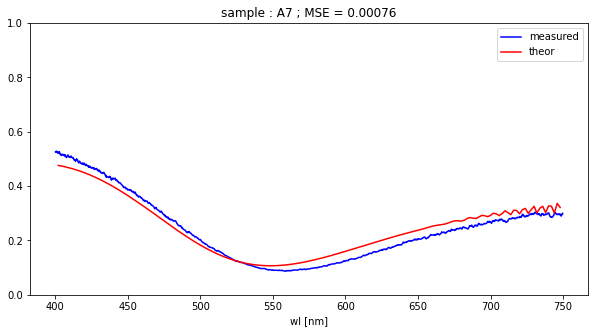

0.000276593703365


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

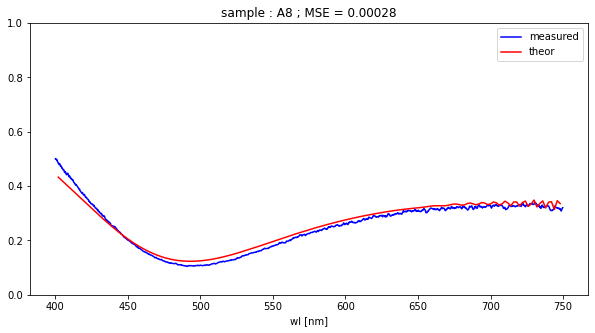

0.000213579040576


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

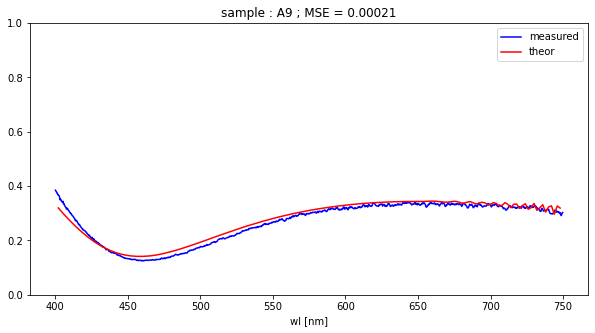

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000122639010505


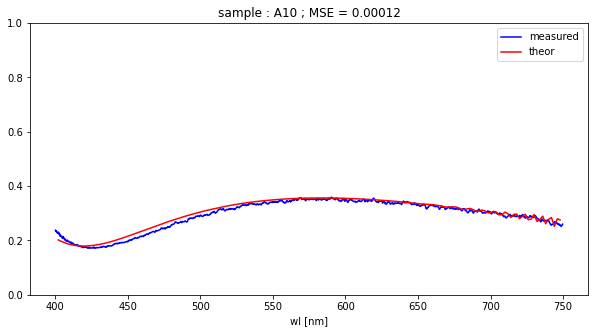

0.000650844267631


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

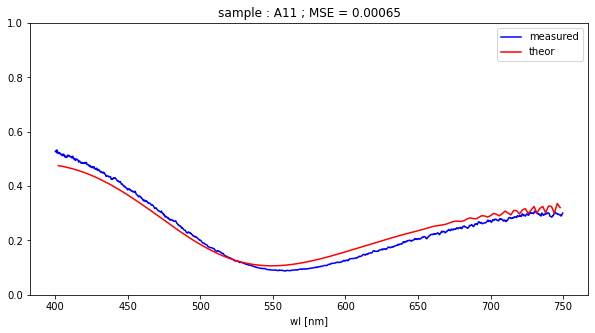

0.000440662262664


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

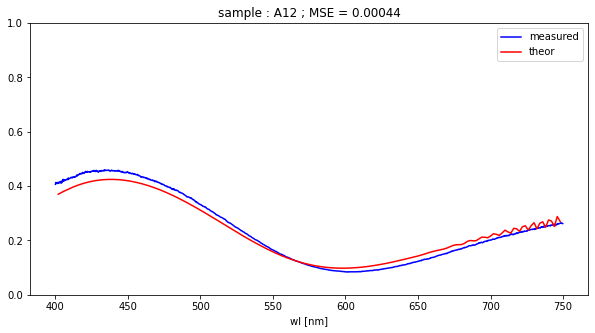

0.000484052262715


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

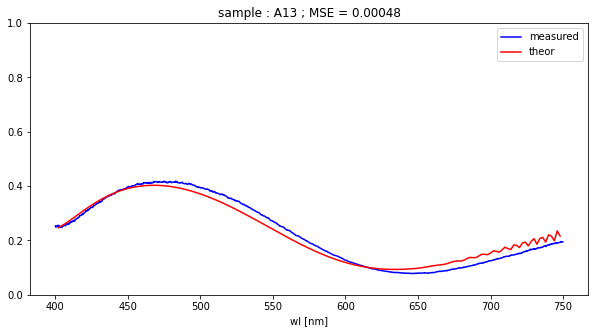

0.00101018461086


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

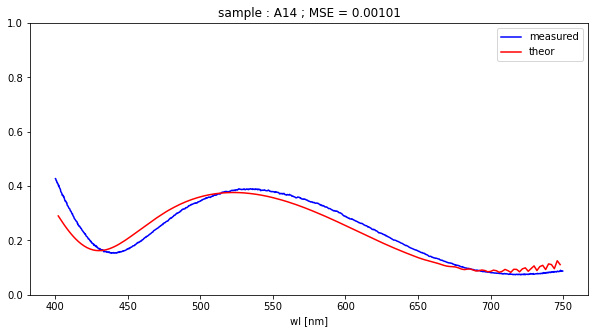

0.00117877812079


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

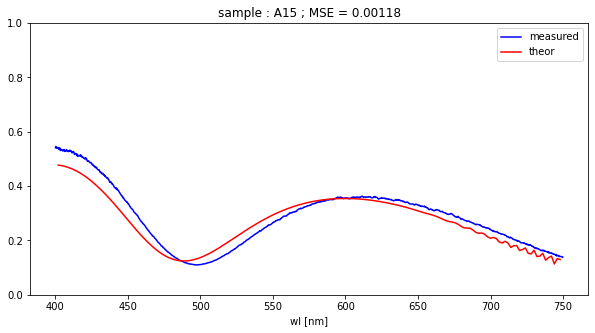

0.000361397665987


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

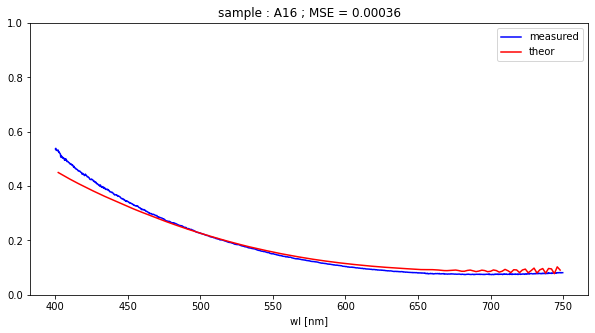

0.000222381808495


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

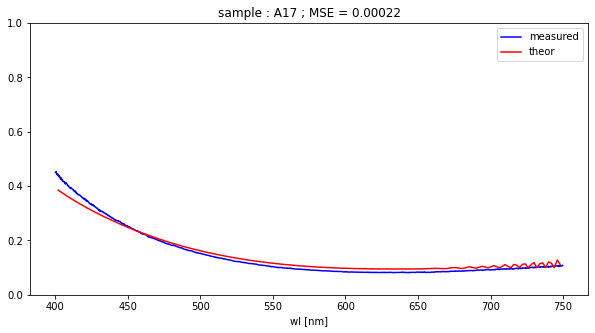

0.000327783142057


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

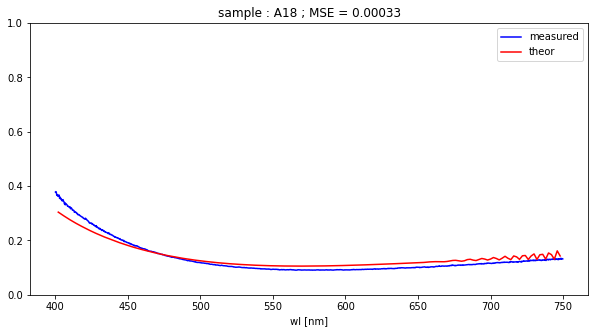

0.000236261155803


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

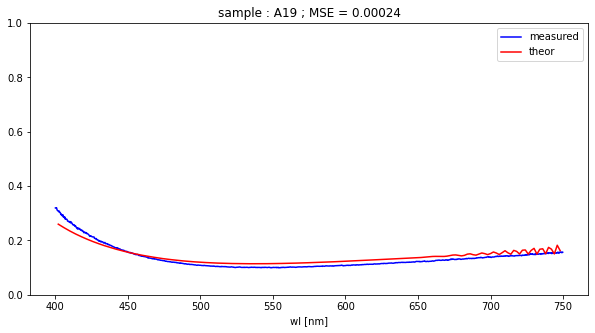

0.00089321751593


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

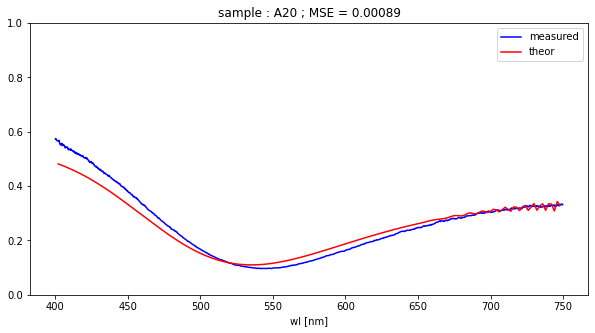

0.00066569120691


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

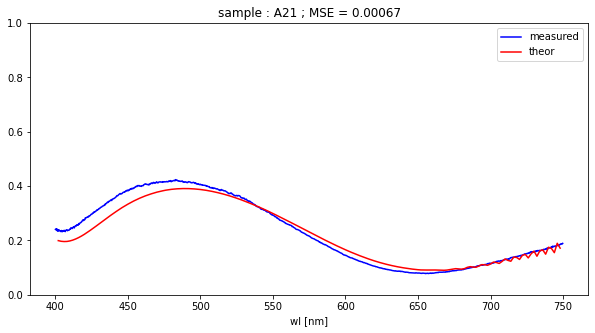

0.000444273387176


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

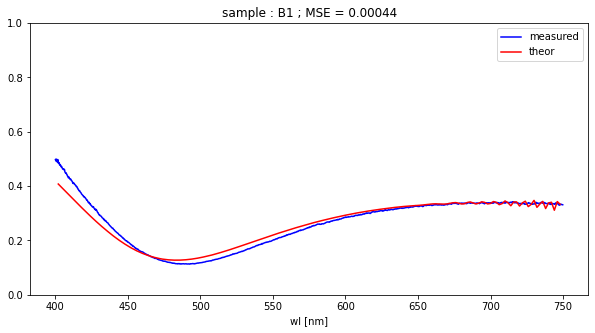

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000878359749107


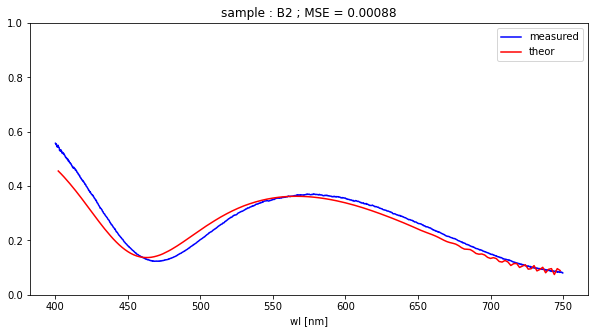

0.000643180416963


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

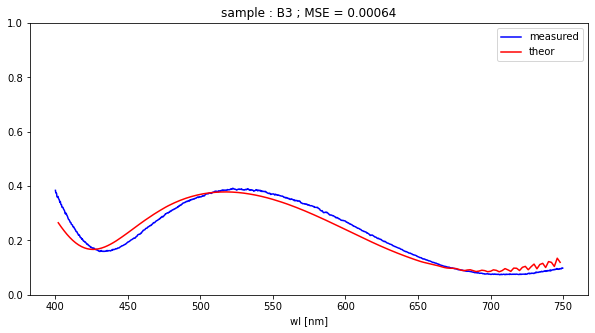

0.000438746292663


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

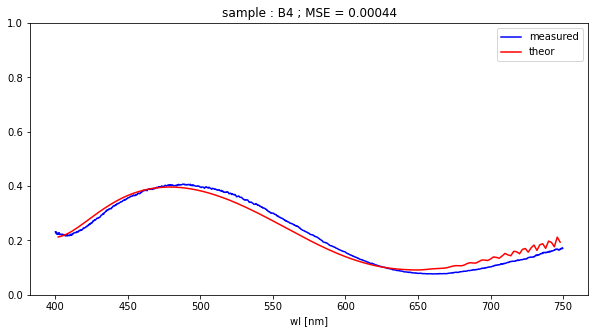

0.000467984220073


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

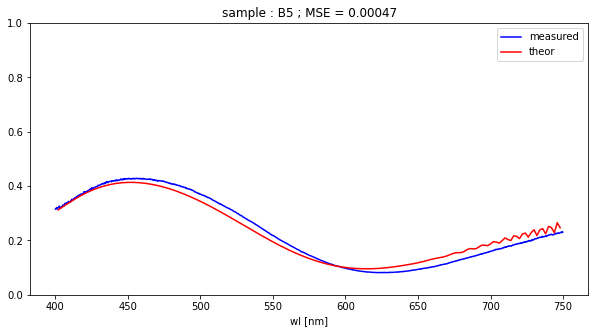

0.000629788629607


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

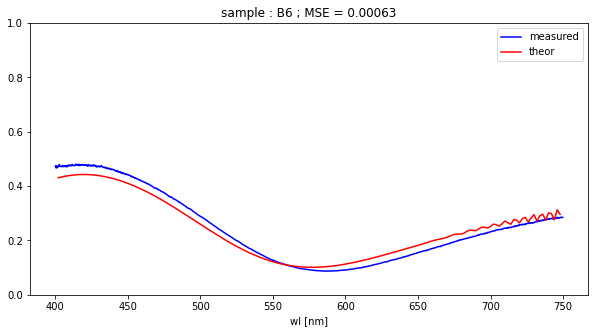

0.00141661354026


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

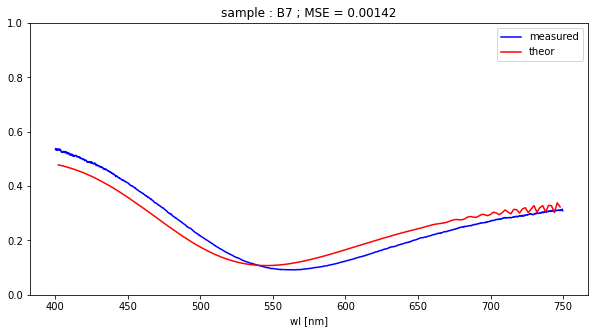

0.000790840007634


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

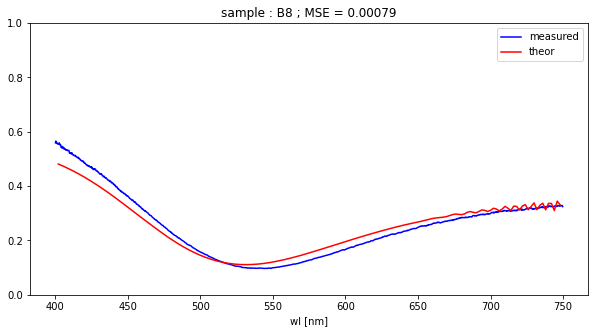

0.000584877349005


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

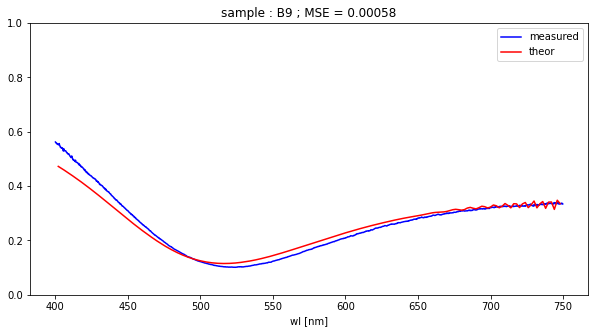

0.000907847574473


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

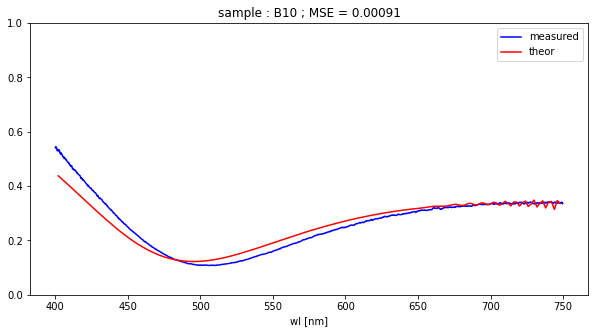

0.001037213373


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

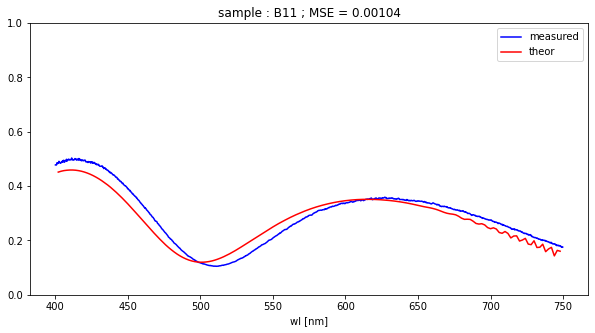

0.000609164743905


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

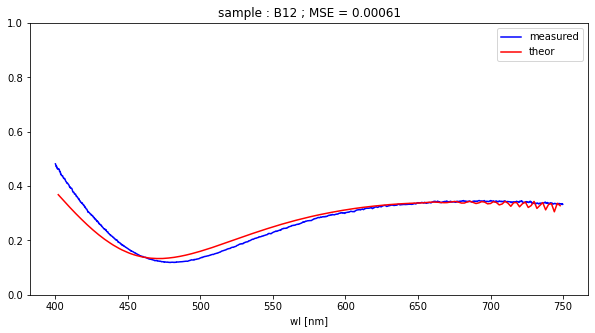

0.000384295297697


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

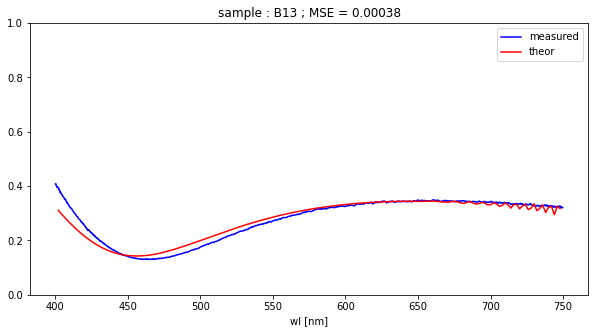

0.000241605984373


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

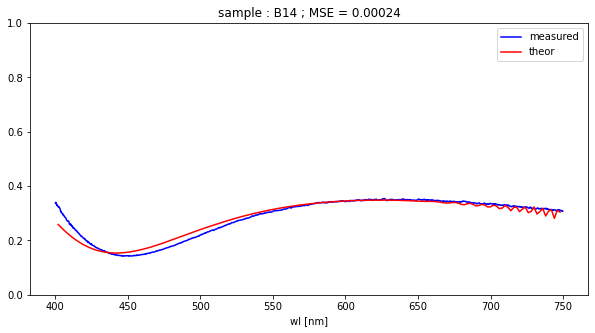

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000217506014319


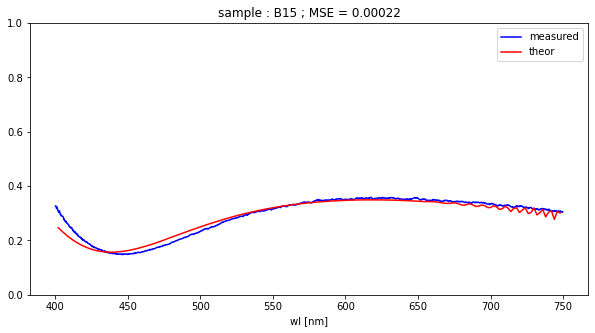

0.000345073541496


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

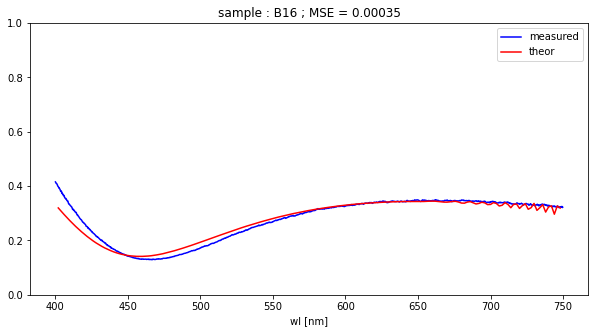

0.00131184672517


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

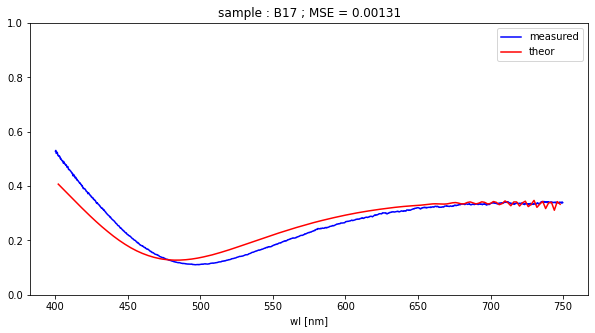

0.000401988913491


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

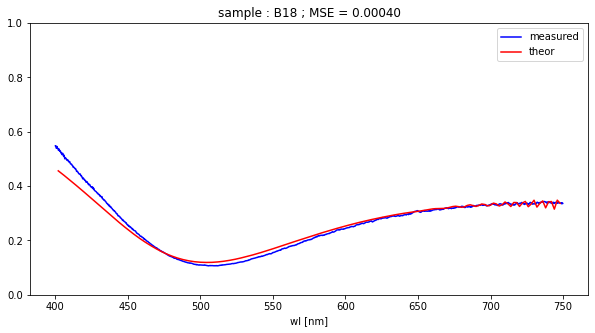

0.000691032469697


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

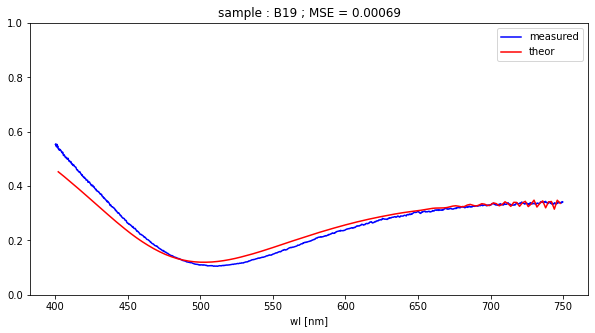

0.000801811079548


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

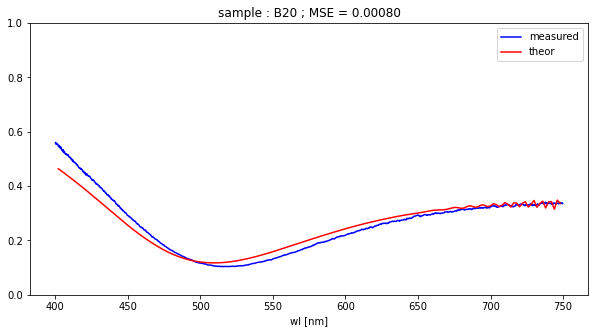

0.000986986064943


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

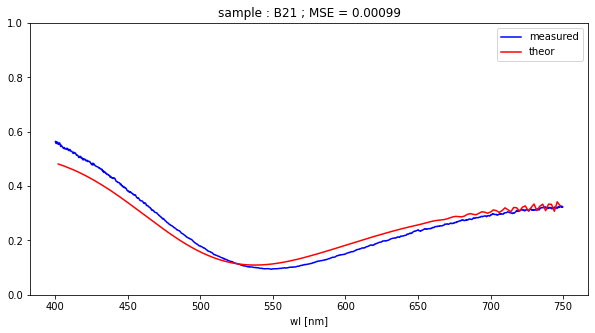

0.000872391577525


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

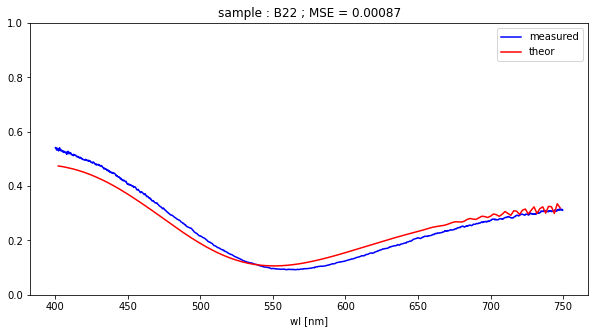

0.000581874672667


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

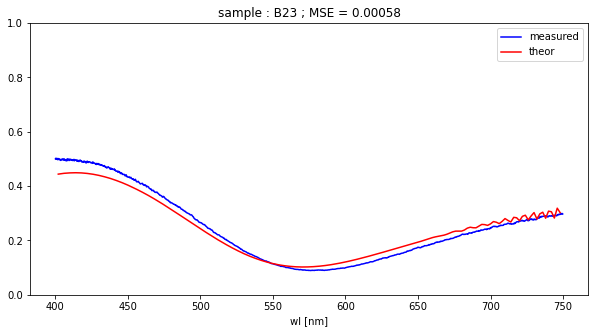

0.000562640072455


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

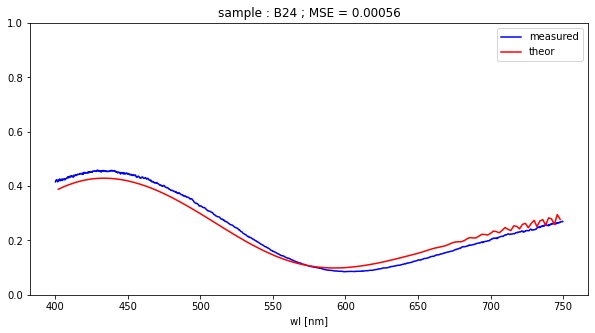

0.00101710181691


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

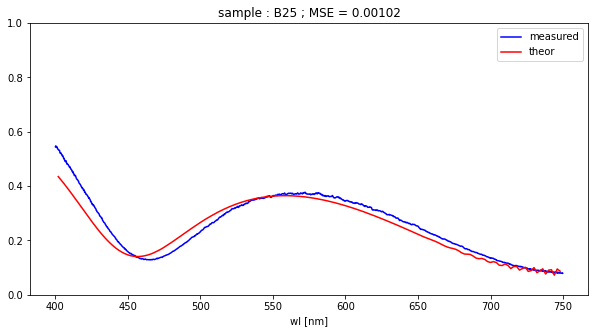

0.000636969910112


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

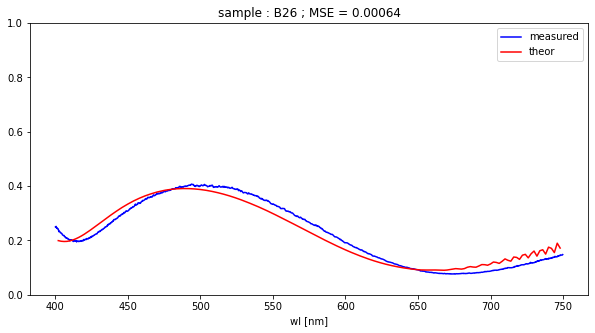

0.000872506106


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

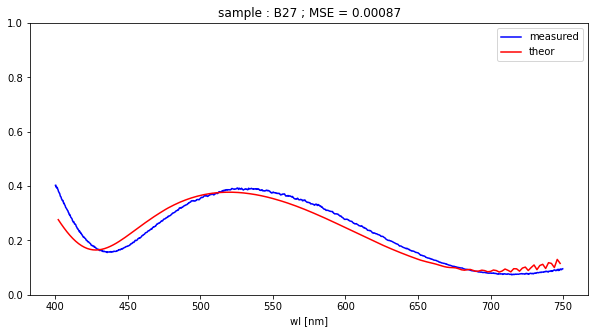

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000889561245529


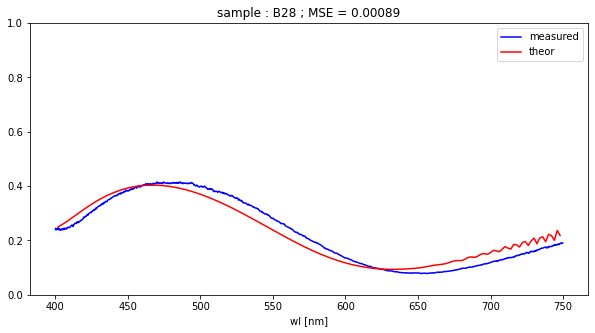

0.000951864411464


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

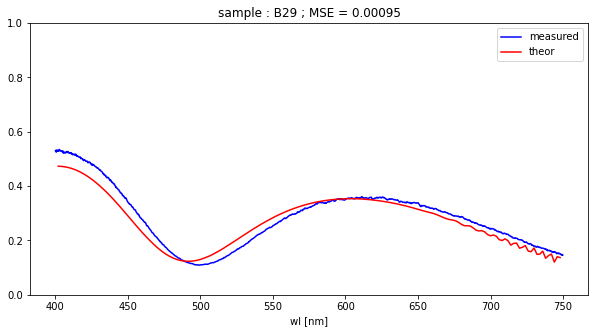

0.000542746071171


  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

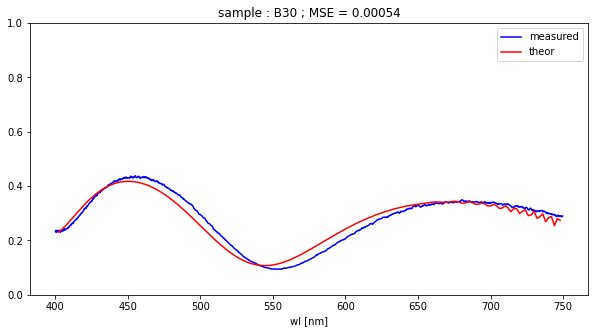

0.00059852653271


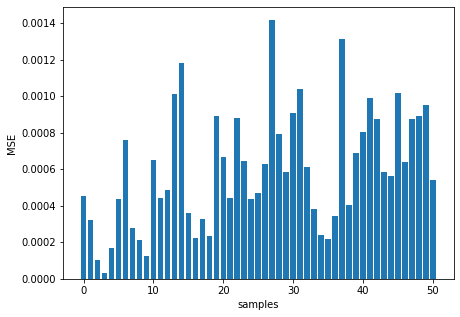

In [14]:
#samples = ab_samples
mse_s = []
result_dir = METADATA + 'results/gt_vs_measured/'

for i, sample in enumerate(samples):
    theor_sp = SpectraTheory(sample.thickness, pmma_file='PMMA_nam_dispersion.txt')
    plt.figure(figsize=[10,5])
    plt.plot(sample.spectra.wl,sample.spectra.intensity,'b', label='measured')
    plt.plot(theor_sp.wl,theor_sp.intensity,'r', label='theor')
    plt.legend()
    plt.ylim(0,1)
    plt.xlabel('wl [nm]')
    curr_mse = MSE(sample.spectra.f(theor_sp.wl),theor_sp.f(theor_sp.wl))
    mse_s.append(curr_mse)
    plt.title('sample : ' + sample.filename + ' ; MSE = %.5f' % curr_mse)
    print(curr_mse)
    #plt.savefig(result_dir+sample.filename+'.png')
    plt.show()
    plt.close()

plt.figure(figsize=[7,5])
print(np.array(mse_s).mean())
plt.bar(np.arange(mse_s.__len__()),mse_s)
plt.xlabel('samples')
plt.ylabel('MSE')
#plt.savefig(result_dir+'AB_hist'+'.png')
plt.show()
plt.close()

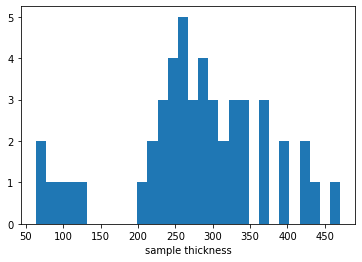

In [15]:
thicknesses = np.array([sample.thickness for sample in samples])
for i,sample in enumerate(samples[:]):
    samples[i].X = sample.spectra.intensity
    samples[i].Y = sample.image.RGB
plt.hist(thicknesses[3:],bins=30)
plt.xlabel('sample thickness')
plt.show()

val_score = 2.35929597009e-05
score = 2.49497800618e-05


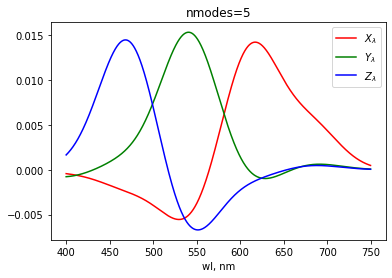

In [16]:
image_type = 'lu'
#samples = np.load("new_samples.npy", allow_pickle=True)
idx = np.arange(len(samples),dtype=np.int32)
train=np.random.choice(idx,int(len(samples)*0.8),replace=False)
test=np.setdiff1d(idx, train)
train = samples[train]
test=samples[test]
# can put either LinearRegression or NNLS
camera=CameraCalibration(train,nmodes=5,fitting='gaussian',
                         regression=LinearRegression,
                         fitting_params={'sigma' : 180})
camera_file = METADATA + 'camera_' + image_type + '_final.npy'
camera.save(camera_file)
#camera = CameraCalibration.load(camera_file)
score = camera.score(test)
print('val_score = ' + str(score))
score = camera.score(samples)
print('score = ' + str(score))
camera.show()

A1
[ 0.09405342  0.13476288  0.11844594]
[ 0.0950308   0.13460797  0.12047453]
1.69814052461e-06


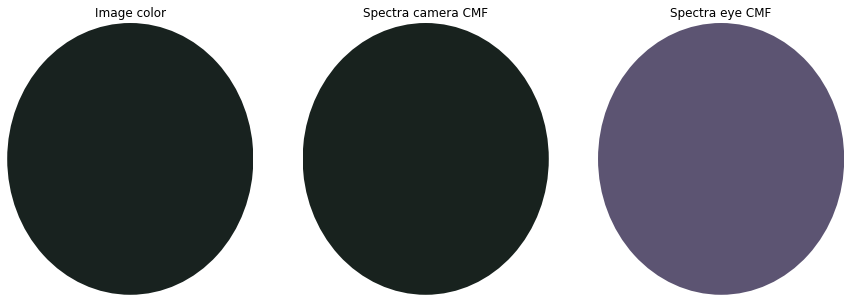

A2
[ 0.13236314  0.15330016  0.09067604]
[ 0.13478206  0.15378563  0.09049052]
2.04041487762e-06


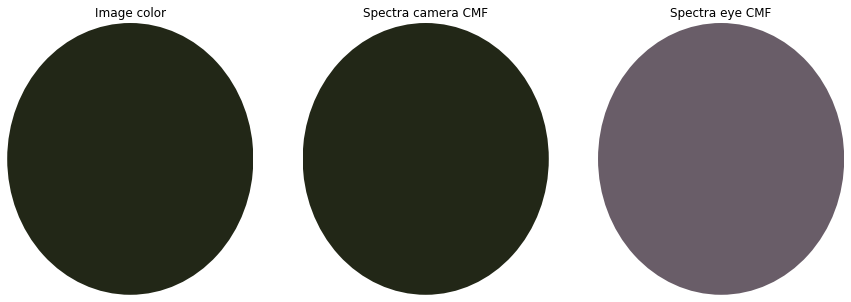

A3
[ 0.13379331  0.15467286  0.0905184 ]
[ 0.13664781  0.15541014  0.09006053]
2.96712211215e-06


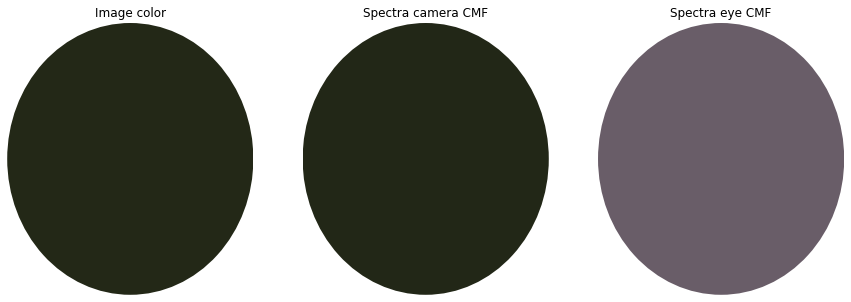

A4
[ 0.18768963  0.22630045  0.09930804]
[ 0.18967167  0.23064218  0.09894373]
7.63728967316e-06


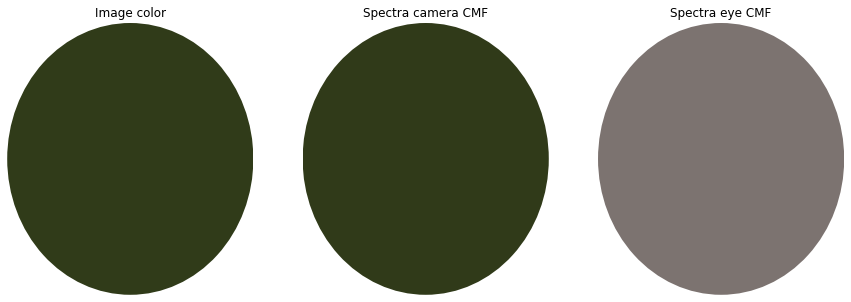

A5
[ 0.1891511   0.22843301  0.10027685]
[ 0.19197301  0.23424239  0.10034803]
1.39057076905e-05


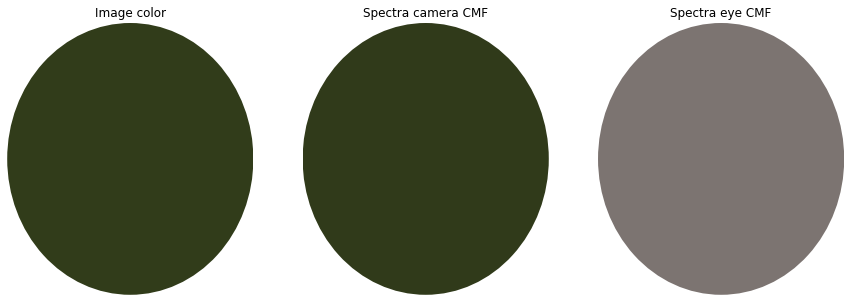

A6
[-0.01206021  0.34599358  0.31243897]
[  7.19089680e-06   3.59092514e-01   3.20266869e-01]
0.000126160041672


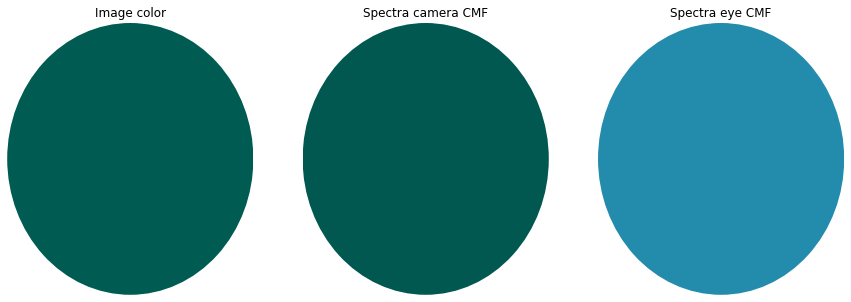

A7
[ 0.14954029  0.1801492   0.30681775]
[ 0.15196424  0.18509187  0.31981823]
6.64393354843e-05


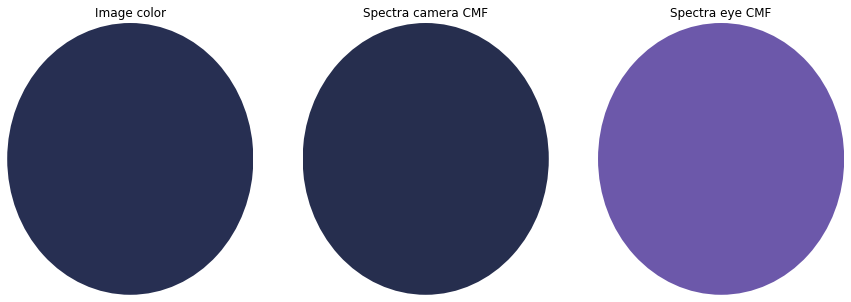

A8
[ 0.3178691   0.21296775  0.11204375]
[ 0.32954042  0.21926812  0.1142284 ]
6.02289594905e-05


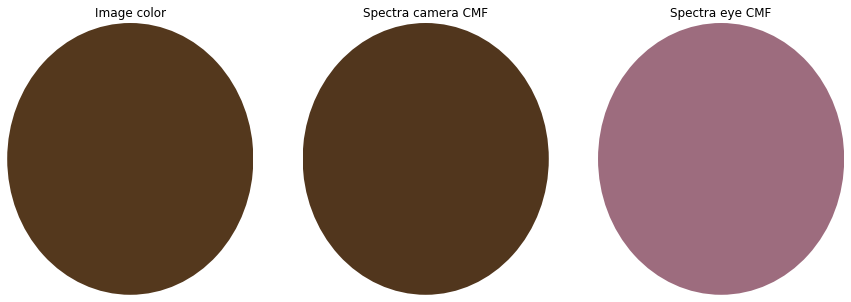

A9
[ 0.34328691  0.30591248  0.05095378]
[ 0.34988356  0.31544243  0.05131034]
4.48209903173e-05


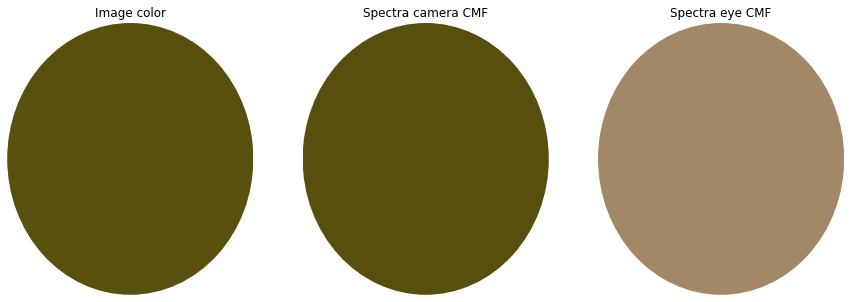

A10
[ 0.31290917  0.40973868  0.0931921 ]
[ 0.31336866  0.41810621  0.09947937]
3.65854864442e-05


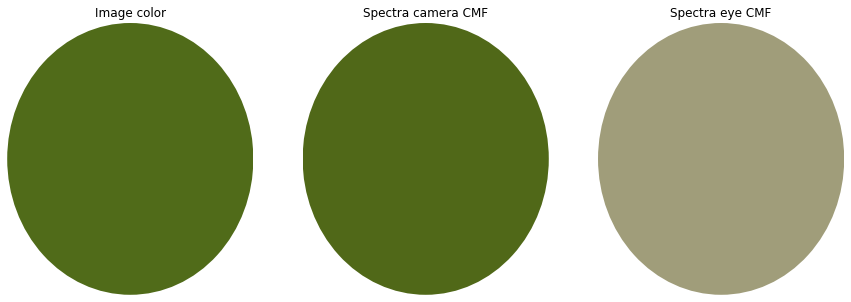

A11
[ 0.15216831  0.18025438  0.30720937]
[ 0.15422535  0.18547354  0.31994605]
6.45646761379e-05


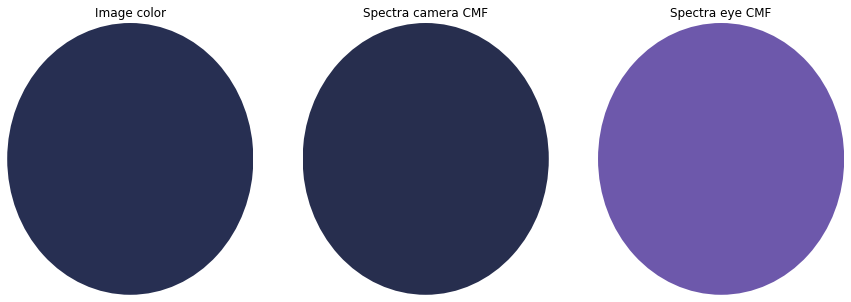

A12
[ 0.02520759  0.28553691  0.36128325]
[ 0.01090701  0.28474824  0.35512897]
8.10012198936e-05


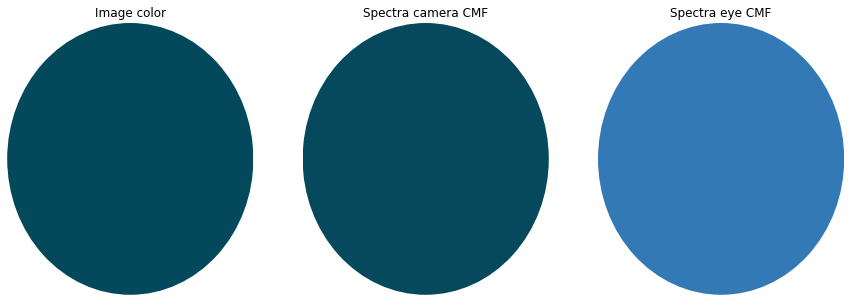

A13
[-0.01432734  0.38846038  0.29767988]
[  2.13168306e-05   3.86356304e-01   2.92713048e-01]
7.83268199946e-05


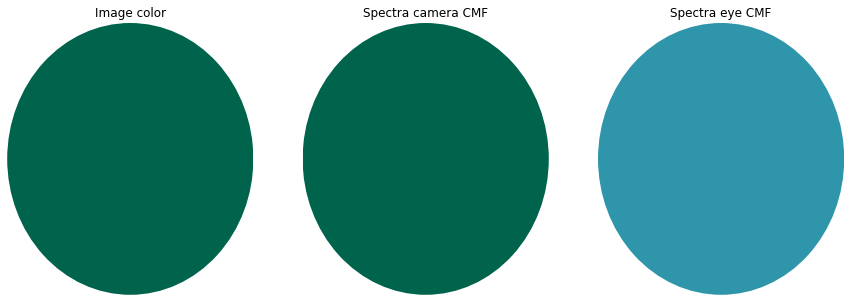

A14
[ 0.12136245  0.44926502  0.09847306]
[ 0.11364887  0.44509776  0.10291103]
3.21869930736e-05


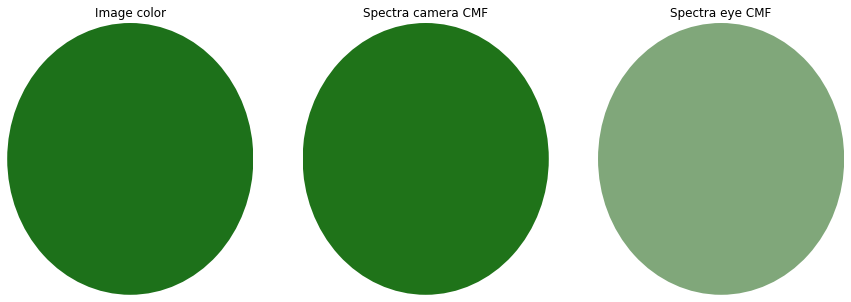

A15
[ 0.33582032  0.28370112  0.1536843 ]
[ 0.33862196  0.28435553  0.14854588]
1.15602685228e-05


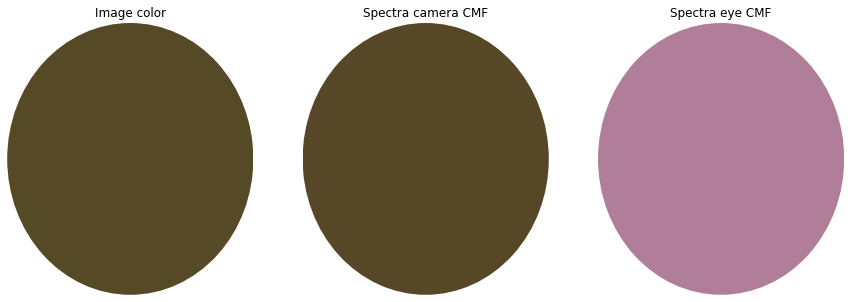

A16
[ 0.01671533  0.22743339  0.26444591]
[ 0.01006966  0.2284567   0.26210316]
1.69002165995e-05


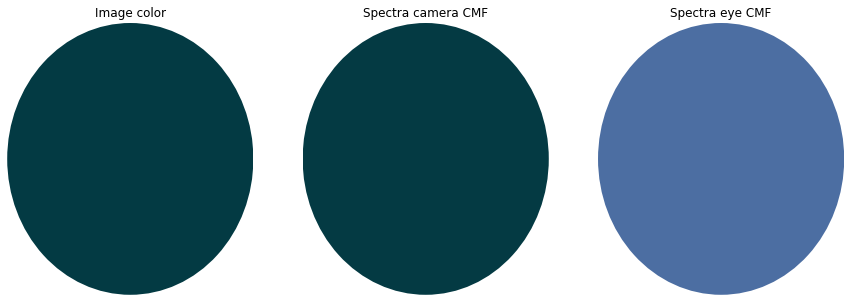

A17
[ 0.04292215  0.16097767  0.19618664]
[ 0.03799987  0.15881047  0.1953018 ]
9.90283621552e-06


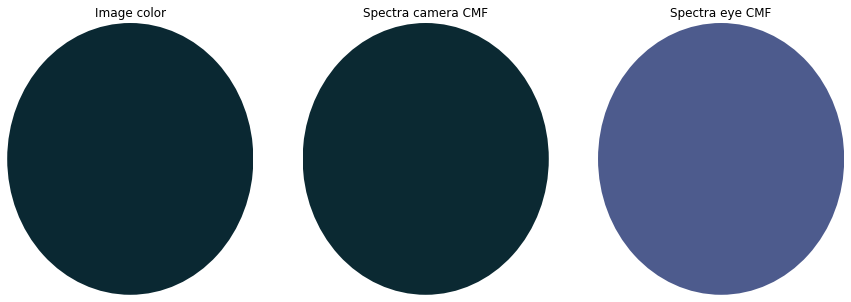

A18
[ 0.07677594  0.14076129  0.1465318 ]
[ 0.07363983  0.13565102  0.1439165 ]
1.42632609678e-05


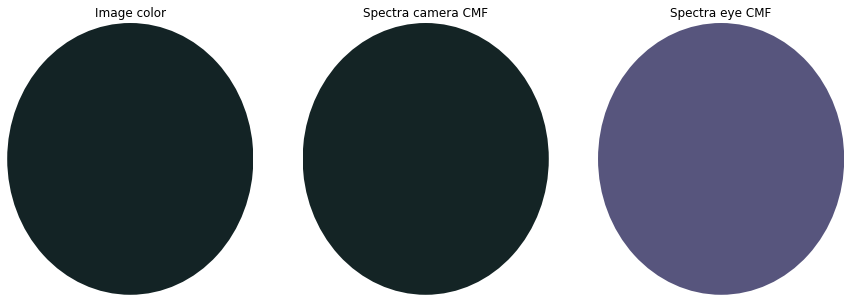

A19
[ 0.10701565  0.14301915  0.1153255 ]
[ 0.10390261  0.13677171  0.11186875]
2.02235595592e-05


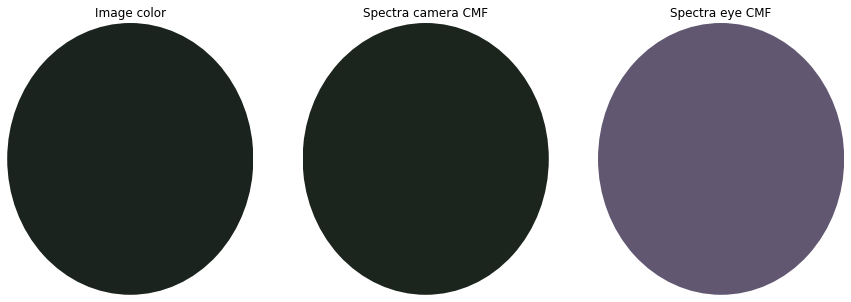

A20
[ 0.20962755  0.17509832  0.28495651]
[ 0.20760645  0.17198743  0.28370727]
5.10770193602e-06


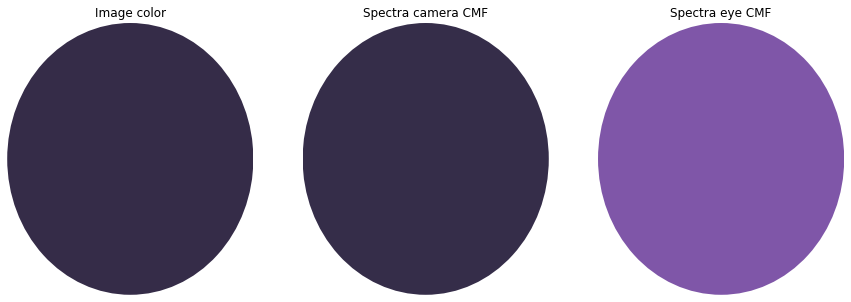

A21
[-0.01080446  0.41020389  0.28309213]
[  1.66350800e-06   4.06546197e-01   2.77728578e-01]
5.29728757772e-05


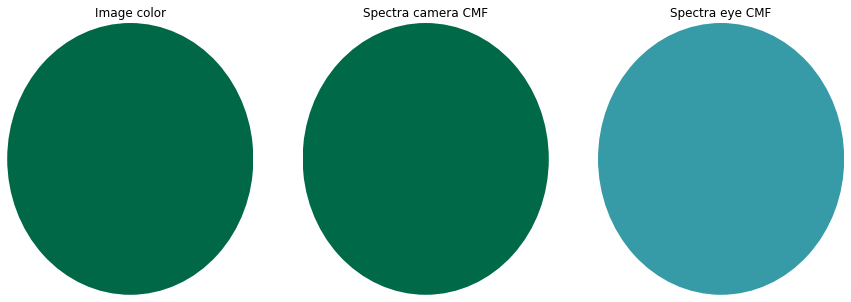

B1
[ 0.33708427  0.23430459  0.1007381 ]
[ 0.33785564  0.23401665  0.09855386]
1.81628434882e-06


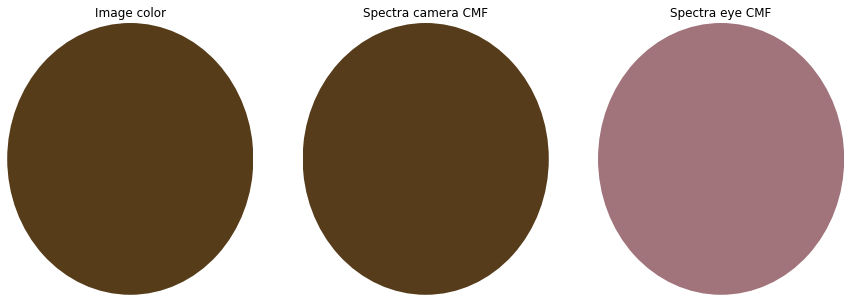

B2
[ 0.2582486   0.37530421  0.06182833]
[ 0.26387224  0.3803888   0.06262268]
1.93698050028e-05


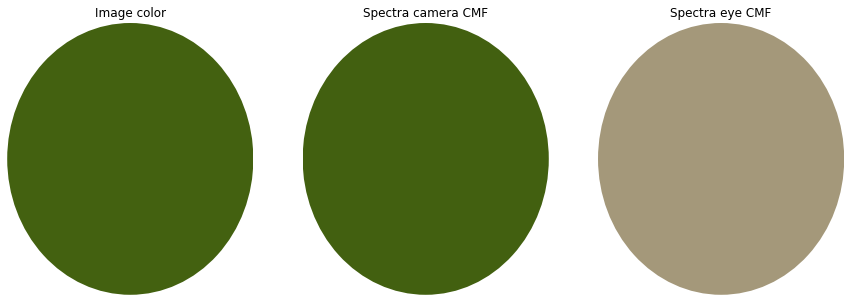

B3
[ 0.09331129  0.4496544   0.11950203]
[ 0.08388976  0.44941771  0.12559462]
4.19802924143e-05


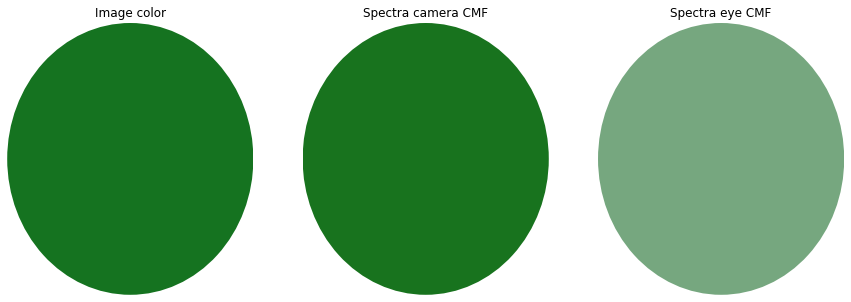

B4
[-0.00544735  0.41164183  0.25920933]
[ 0.00058027  0.41241565  0.25960578]
1.23627243775e-05


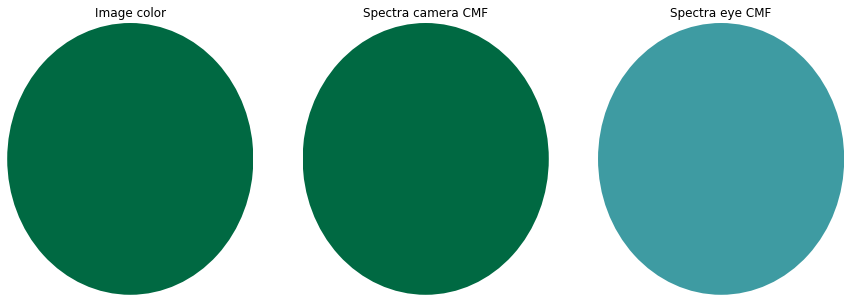

B5
[-0.0066771   0.33957318  0.33518031]
[  2.86236293e-04   3.40788207e-01   3.33024359e-01]
1.82041700084e-05


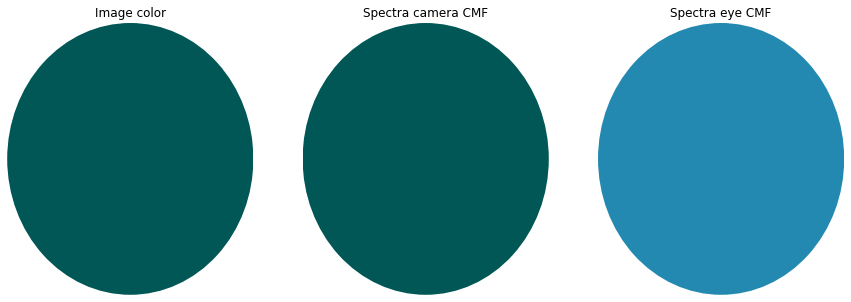

B6
[ 0.06770126  0.24105805  0.35693903]
[ 0.0584709   0.24163937  0.35682988]
2.85164640096e-05


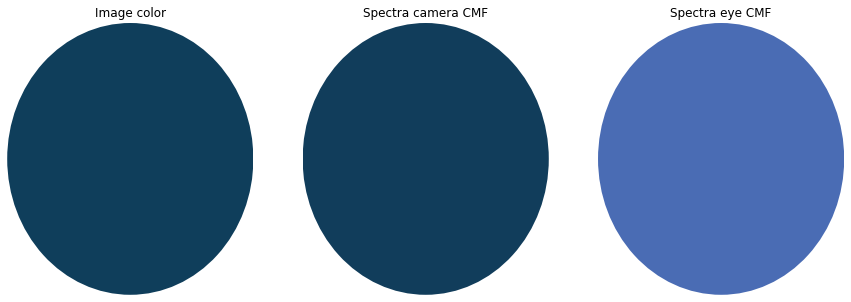

B7
[ 0.14423823  0.19118358  0.32386216]
[ 0.14238299  0.19035077  0.32623322]
3.25247674032e-06


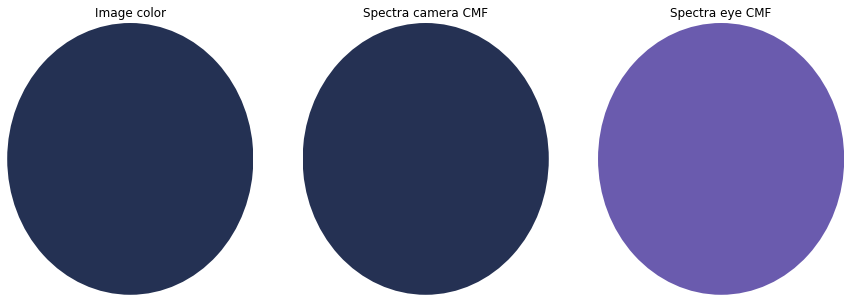

B8
[ 0.21440883  0.17188506  0.26881859]
[ 0.21595032  0.17049229  0.27243239]
5.79185389298e-06


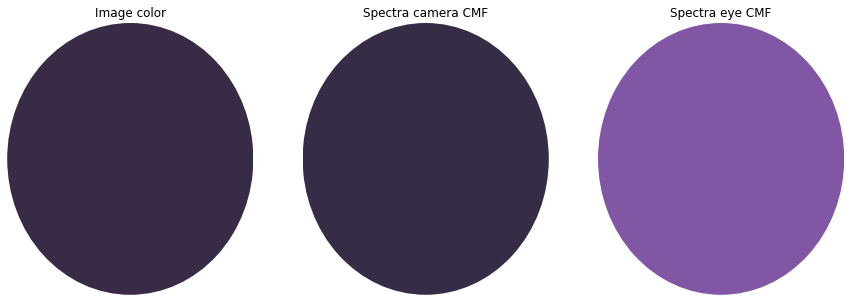

B9
[ 0.26862669  0.1767873   0.21054746]
[ 0.26998481  0.17469962  0.21166165]
2.4814480438e-06


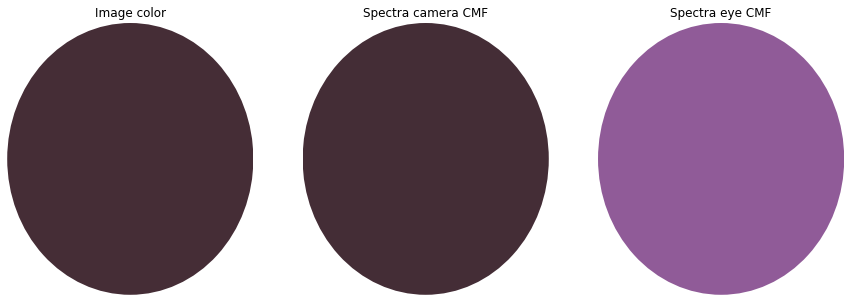

B10
[ 0.31073463  0.20029548  0.15133752]
[ 0.31196342  0.19812409  0.14956853]
3.11807155637e-06


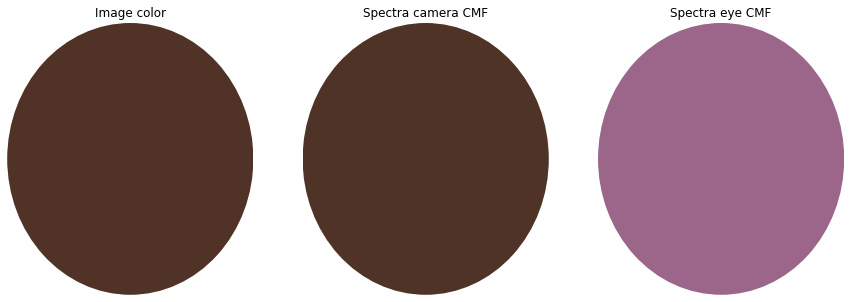

B11
[ 0.34477284  0.2464248   0.21236942]
[ 0.34739604  0.24766024  0.21085779]
3.56416851286e-06


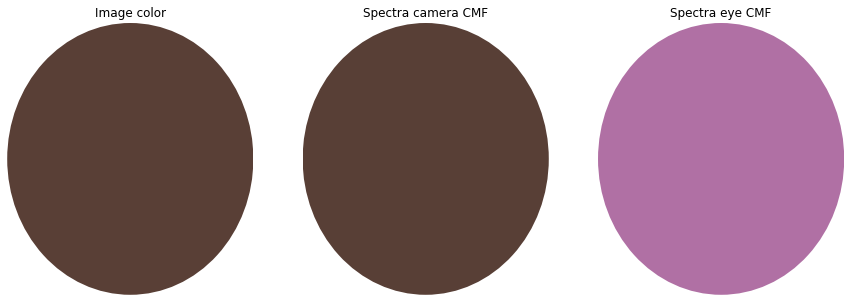

B12
[ 0.35013562  0.26272172  0.07864234]
[ 0.34698009  0.25992013  0.07591292]
8.41866714613e-06


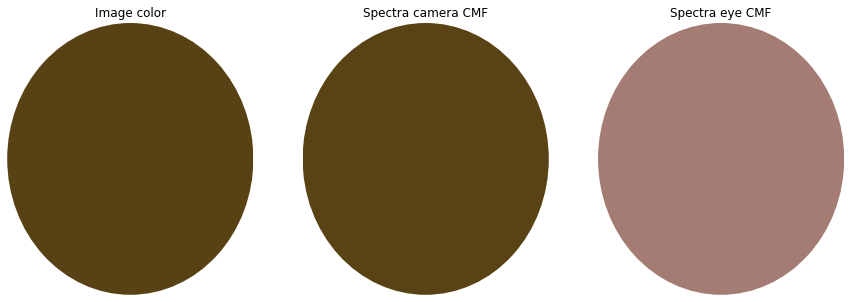

B13
[ 0.35553965  0.31071989  0.05456518]
[ 0.35121737  0.3088829   0.05326113]
7.91905847298e-06


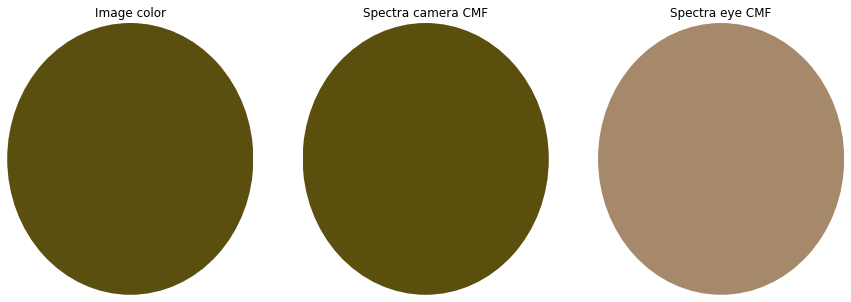

B14
[ 0.35132675  0.3552966   0.05363922]
[ 0.34477942  0.35328103  0.05446053]
1.58681766911e-05


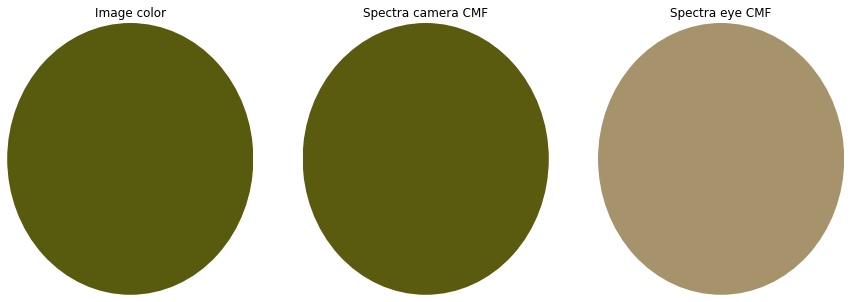

B15
[ 0.35171046  0.36956659  0.05742805]
[ 0.34297937  0.3657016   0.05824107]
3.06103609841e-05


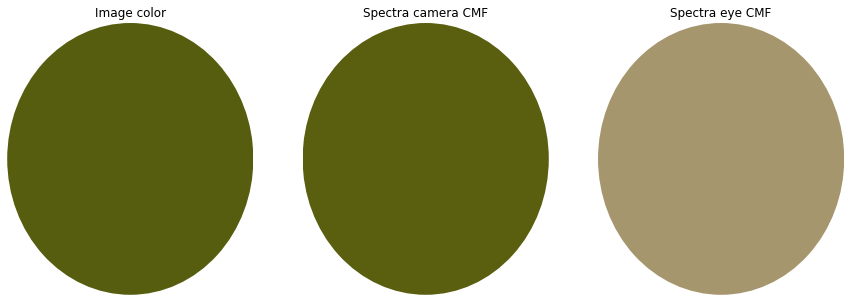

B16
[ 0.35695588  0.30818514  0.05568542]
[ 0.351912    0.30583165  0.05415312]
1.11091829179e-05


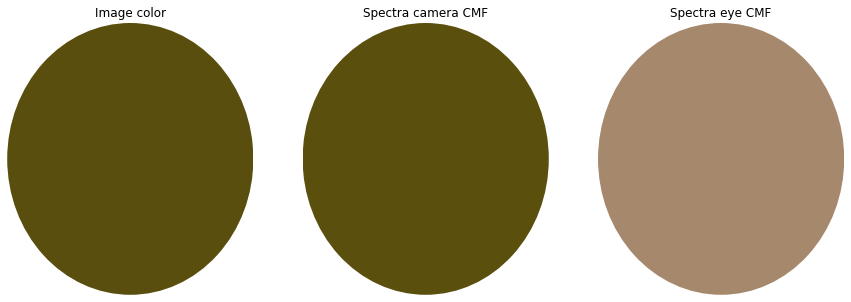

B17
[ 0.32467017  0.21704421  0.12536428]
[ 0.32568969  0.21544235  0.12349602]
2.36525841042e-06


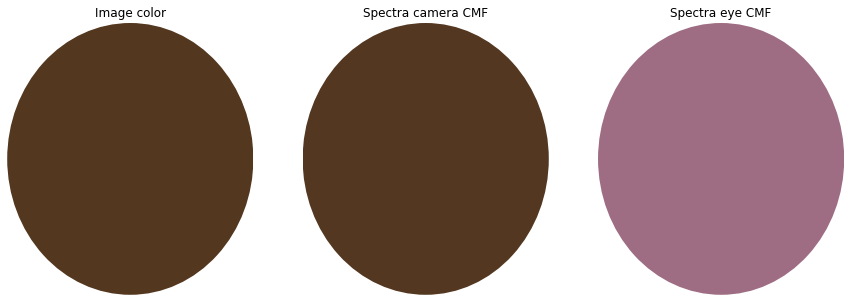

B18
[ 0.30570289  0.19618046  0.15940697]
[ 0.3067284   0.19394407  0.15828705]
2.43577781222e-06


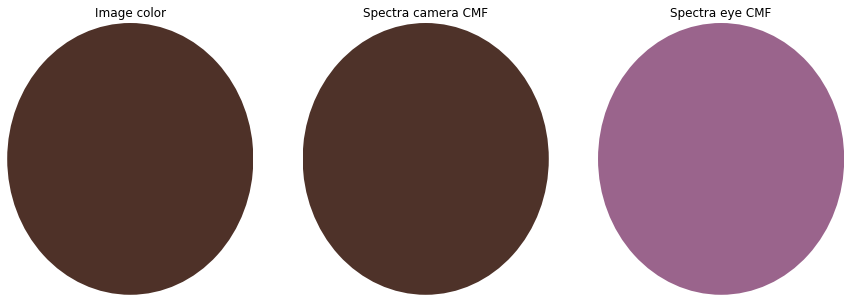

B19
[ 0.30118921  0.19256658  0.16717275]
[ 0.30266747  0.1903097   0.16594521]
2.92853782927e-06


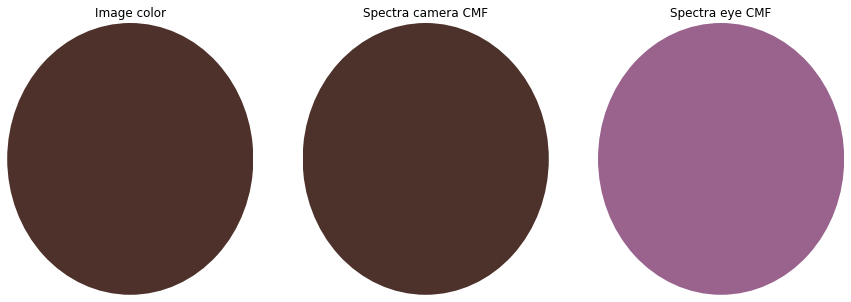

B20
[ 0.280548    0.18151594  0.19523828]
[ 0.28202186  0.1792376   0.19533059]
2.45720880576e-06


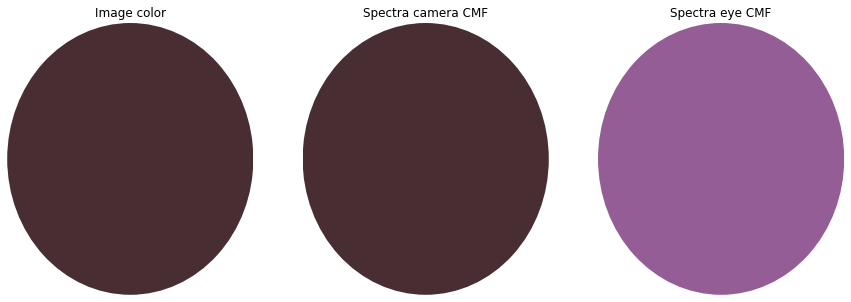

B21
[ 0.19010556  0.17708741  0.29412269]
[ 0.18870707  0.17561793  0.29611221]
2.69111015596e-06


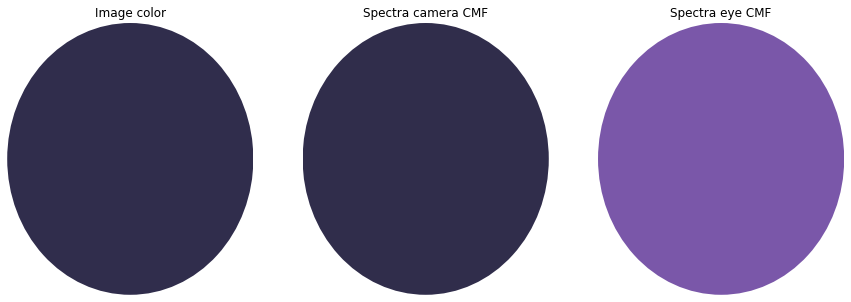

B22
[ 0.14591208  0.19175911  0.32404767]
[ 0.14240075  0.19091713  0.32597071]
5.57880327194e-06


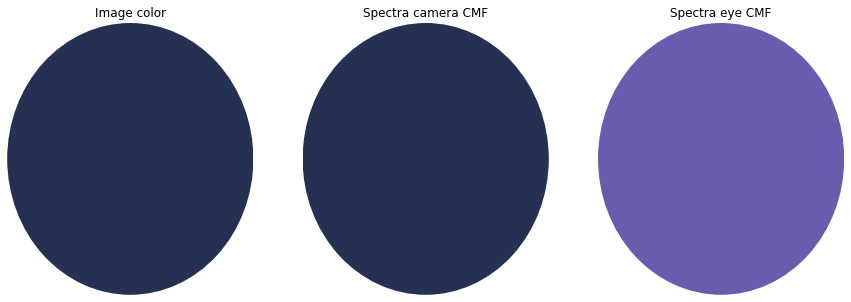

B23
[ 0.0922091   0.22298345  0.35102093]
[ 0.08263168  0.2242718   0.35125369]
3.11469799328e-05


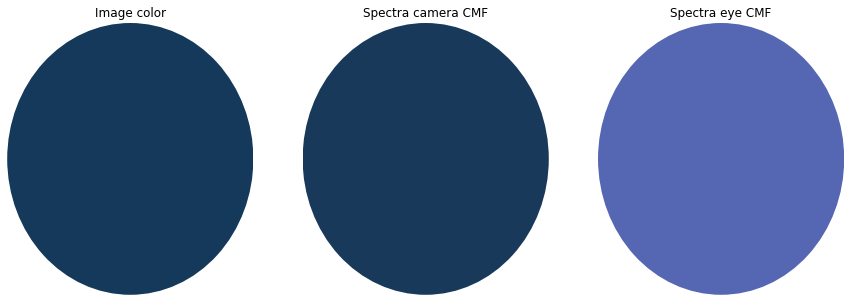

B24
[ 0.02946784  0.28098049  0.35873037]
[ 0.01491235  0.28257655  0.3579074 ]
7.16956603008e-05


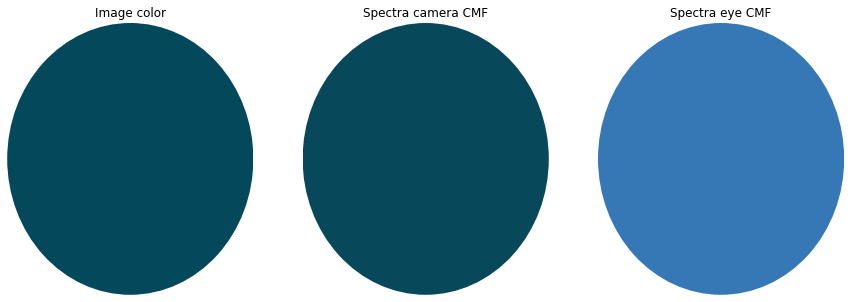

B25
[ 0.23705179  0.3960139   0.05720185]
[ 0.24000806  0.39760363  0.05930831]
5.2346541299e-06


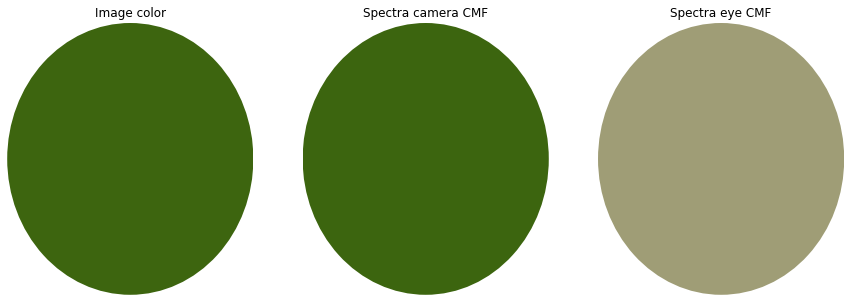

B26
[ 0.01647193  0.4395279   0.21643869]
[ 0.00131926  0.43614499  0.21708055]
8.04864770103e-05


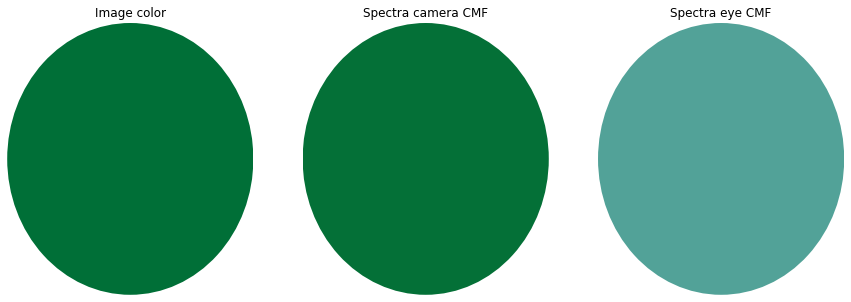

B27
[ 0.10802951  0.45146386  0.10811689]
[ 0.10002432  0.4493797   0.11354245]
3.26211390472e-05


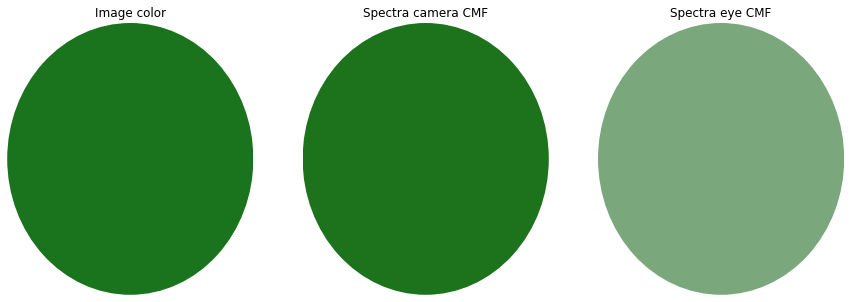

B28
[-0.01237279  0.39845267  0.28677366]
[  3.22309684e-04   3.95977761e-01   2.84004302e-01]
5.83200027539e-05


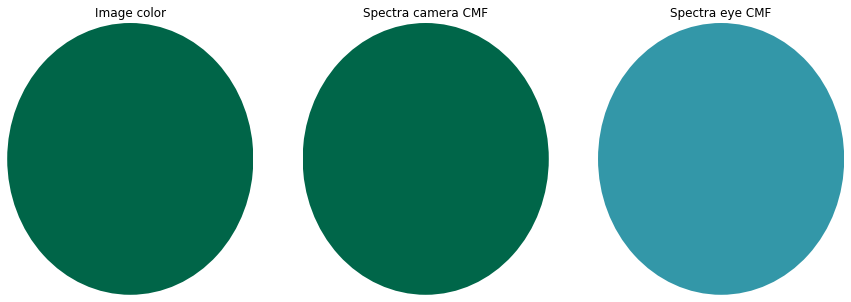

B29
[ 0.33706633  0.27608859  0.162619  ]
[ 0.34118168  0.27803957  0.16053642]
8.35985415625e-06


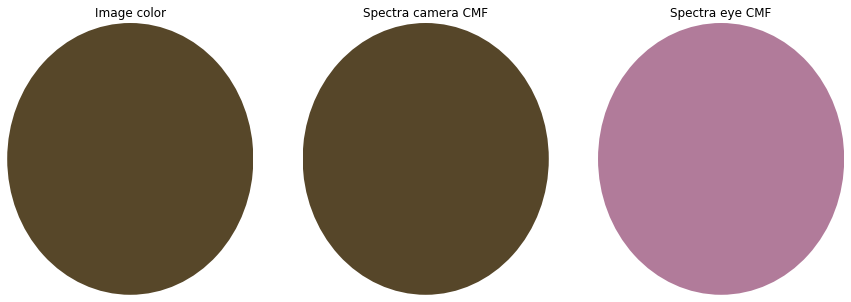

B30
[ 0.2559607   0.23290789  0.33542567]
[ 0.25414556  0.23264833  0.33725828]
2.24019745184e-06


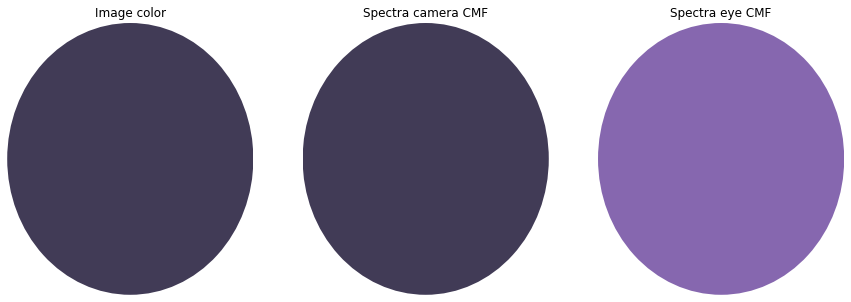

In [17]:
mses = []
for sample in samples:
    if sample in test:
        stype='TEST'
    elif sample in train:
        stype='TRAIN'
    else:
        ValueError("Unrecognized type!")
    plt.figure(figsize=[15,5])
    RGB=camera.spectra_to_XYZ(sample.spectra.wl,
                          sample.spectra.intensity)
    RGB_image = sample.image.RGB
    RGB_spectra = sample.spectra.color.RGB
    print(sample.filename)
    print(np.array(RGB))
    print(RGB_image)
    curr_mse = MSE(np.array(RGB),RGB_image)
    print(curr_mse)
    mses.append(curr_mse)
    plt.subplot(1,3,1)
    plt.title('Image color')
    Spectra.show_calculated_color(RGB_image)
    plt.subplot(1,3,2)
    plt.title('Spectra camera CMF')
    Spectra.show_calculated_color(np.clip(np.array(RGB),0,1))
    plt.subplot(1,3,3)
    plt.title('Spectra eye CMF')
    Spectra.show_calculated_color(RGB_spectra)
    plt.savefig(METADATA + 'results/colors/'+sample.filename+'-'+image_type+'.png')
    plt.show()
    plt.close()

Text(0.5, 0, 'samples')

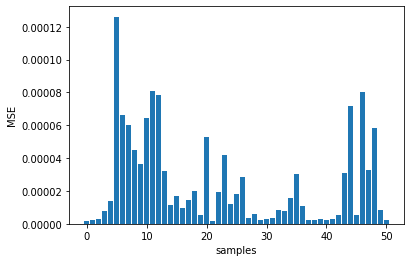

In [18]:
plt.bar(np.arange(len(mses)),mses)
plt.ylabel('MSE')
plt.xlabel('samples')